###Challenge Activities

1. What steps would you take to solve this problem? Please describe as completely and clearly as possible all the steps that you see as essential for solving the problem.
* EDA, Trying to figure out a reference for the values, understanding main columns/factors to a possible failure, creating labels for the situations described, predicting those labels in the dataframe, understanding expected costs x saved costs.

2. Which technical data science metric would you use to solve this challenge? Ex: absolute error, rmse, etc. 
* f-1 score

3. Which business metric  would you use to solve the challenge?
* saved costs, total cost

4. How do technical metrics relate to the business metrics?
* Business metrics are the metrics we bring to the table/dashboard, technical metrics are used to make decisions about the model itself

5. What types of analyzes would you like to perform on the customer database?
* Understand main scores for defects, correlate main factors and try to understand the right moment to send vehicles to repair service and how much can we save optimizing with the clusters

6. What techniques would you use to reduce the dimensionality of the problem? 
*How much a colum Represents in information%, Correlation, P-value, if necessary a score

7. What techniques would you use to select variables for your predictive model?
*How much a colum Represents in information%, Correlation, P-value, if necessary a score

8. What predictive models would you use or test for this problem? Please indicate at least 3.
* Random Forest, Decision Tree, Logistic Regression, Clustering

9. How would you rate which of the trained models is the best?
* Understanding the data, the expected output and the performance metrics

10. How would you explain the result of your model? Is it possible to know which variables are most important?
*I can get the information of wich features are more important for the model as in the last cell, through "model.feature_importances_"

11.How would you assess the financial impact of the proposed model?
* Just did it ath the end of the code :# Saved money on no_defsent and def_notsent 

12.What techniques would you use to perform the hyperparameter optimization of the chosen model?
* probability, depth, features, assign weight to variables

13. What risks or precautions would you present to the customer before putting this model into production?
* Explaining it´s a model and may not be exact because there are other things that may impact. I´d bring up the theme that the columns are coded so all the desisions were purelly logical and mathemaical with no input of from business, which approaches the model of the real world

14. If your predictive model is approved, how would you put it into production?
* save the trained model and apply it to the dataset, or deploy the model to a data visualization service. I think it would be necessary to understand the needs, structure and opportunities of the business to deploy it.

15. If the model is in production, how would you monitor it?
* Through savings, if there´s a real impact and through the technical metrics

16. If the model is in production, how would you know when to retrain it?
* Everytime f1-score does not reach the desired value, if we have newer features that could be correlated to issues, or yearly(due to the dataset granularity).


In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#Dados podem ser baixados em: https://drive.google.com/drive/folders/1KZX9AQQA1j8Ew0wRE9P_Qzwsd9_e5RNp

In [2]:
# Load the datasets 
previous_years_data = pd.read_csv('air_system_previous_years.csv')
present_year_data = pd.read_csv('air_system_present_year.csv')

# estrutura?
print("Previous Years Data Shape:", previous_years_data.shape)
print("Present Year Data Shape:", present_year_data.shape)
print("Colunas idênticas?:", (previous_years_data.columns) == (present_year_data.columns))

Previous Years Data Shape: (60000, 171)
Present Year Data Shape: (16000, 171)
Colunas idênticas?: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  

In [3]:
## Tratamento em ambos:
for datasets in [previous_years_data,present_year_data]:
    datasets.replace("na", np.nan, inplace=True)
    datasets['class'] = previous_years_data['class'].replace({"neg": 0, "pos": 1})
    for col in datasets.columns:
        datasets[col] = pd.to_numeric(datasets[col],errors = 'coerce')
#         datasets[col] =datasets[col].fillna(datasets[col].median())
    datasets['soma'] = datasets.sum(axis=1) - datasets['class']

### Data understanding/feat

In [4]:
# Checando representatividade dos dados

In [5]:
cols = []
values = [] 
soma_total = previous_years_data['soma'].sum()

for col in previous_years_data.drop('soma',axis=1).columns:
#     print(col)
    cols.append(col)
    percentual = round((previous_years_data[col].sum() /soma_total) *100 , 2)
    values.append(percentual)
#     print(percentual, "\n")

explor = pd.DataFrame({"coluna": cols, "percentual": values})

> 99% = True
% do total de valores na tabela = 99.07000000000001
Total de colunas: 60


<AxesSubplot:xlabel='coluna'>

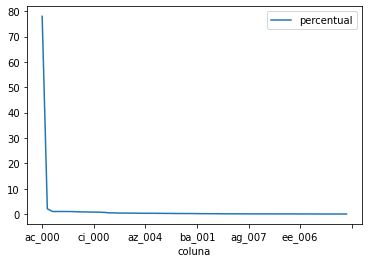

In [6]:
rep_percent_min_col = 0.05

perc_valores = explor[explor.percentual>=rep_percent_min_col].sort_values(ascending=False, by = "percentual")

print('> 99% =', perc_valores.percentual.sum()>99)
print('% do total de valores na tabela =', perc_valores.percentual.sum())
print('Total de colunas:' ,len(perc_valores.coluna))
perc_valores.set_index('coluna').plot()

In [7]:
# Calculate correlation with 'class' column
correlation = previous_years_data.corrwith(previous_years_data['class'])

#forte 0.7, moderada 0.5, não desprezível 0.3
corte_corr = 0.3
corr = correlation[(correlation > corte_corr) |(correlation < -corte_corr)]

# Get the names of columns with strong correlation
cols = corr.index.tolist()
cols = list(set(cols + ['soma'] + list(perc_valores.coluna)))
#colunas 
print(f'total de colunas {len(cols)}')

#selecionado colunas que fazem sentido pela correlação e pela representatividade dos dados
previous_years_data = previous_years_data[cols]
present_year_data = present_year_data[cols]

total de colunas 86


In [8]:
# clusters

In [9]:
## input das medianas nos NaNs:
for datasets in [previous_years_data,present_year_data]:
    for col in datasets.columns:
        datasets[col] =datasets[col].fillna(datasets[col].median())

In [10]:
from sklearn.cluster import KMeans

# Aplicar KMeans para clustering inicial
kmeans = KMeans(n_clusters=4, random_state=42)

# Adicionar os clusters ao DataFrame
clusters = kmeans.fit_predict(previous_years_data)
previous_years_data['initial_cluster'] = clusters

clusters1 = kmeans.fit_predict(present_year_data)
present_year_data['initial_cluster'] = clusters1

In [11]:
# Checagem e identificação dos rótulos dos clusters

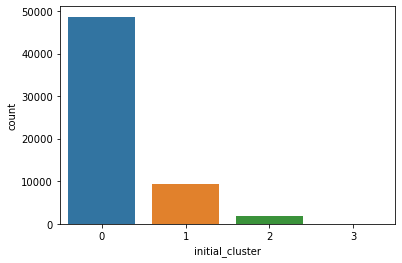

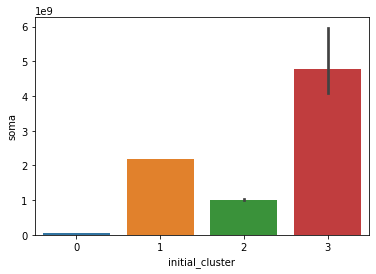

In [12]:
# Visualizar os clusters iniciais 
sns.countplot(x='initial_cluster', data=previous_years_data)
plt.show()
sns.barplot(data = previous_years_data, x='initial_cluster',y='soma')
plt.show()

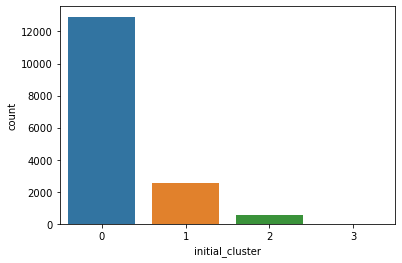

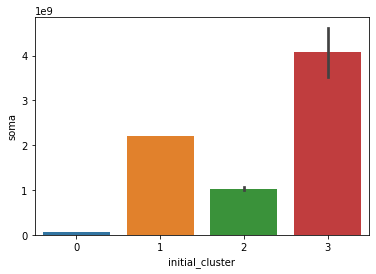

In [13]:
# Visualizar os clusters iniciais 
sns.countplot(x='initial_cluster', data=present_year_data)
plt.show()
sns.barplot(data = present_year_data, x='initial_cluster',y='soma')
plt.show()

In [14]:
gpby= previous_years_data.groupby('initial_cluster')['soma'].agg(['sum','count'])
gpby['raz'] = gpby[gpby.columns[0]]/ gpby[gpby.columns[1]]
gpby.sort_values(by="raz", ascending = False)

,sum,count,raz
initial_cluster,,,
3,2.200032e+11,46,4.782679e+09
1,2.081809e+13,9468,2.198784e+09
2,1.878872e+12,1844,1.018911e+09
0,2.947866e+12,48642,6.060331e+07


In [15]:
def rotulo_cluster(df, col_clusters):
    df['cluster'] = df[col_clusters].replace({0:'nodef_notsent',
                                            1:'def_sent',
                                            2: 'no_defsent',
                                            3:'def_notsent'})

rotulo_cluster(previous_years_data,'initial_cluster')   
rotulo_cluster(present_year_data,'initial_cluster')    

In [16]:
custo_prev_year=previous_years_data.groupby('cluster')['soma'].sum()
custo_prev_year

cluster
def_notsent      2.200032e+11
def_sent         2.081809e+13
no_defsent       1.878872e+12
nodef_notsent    2.947866e+12
Name: soma, dtype: float64

In [17]:
custo_pres_year=present_year_data.groupby('cluster')['soma'].sum()
custo_pres_year

cluster
def_notsent      5.721270e+10
def_sent         5.571118e+12
no_defsent       5.540062e+11
nodef_notsent    7.943644e+11
Name: soma, dtype: float64

In [18]:
# Modelo preditivo dos clusters para tomada de ação

In [19]:
# from sklearn.model_selection import train_test_split

# X = previous_years_data.drop('cluster', axis =1)
# y = previous_years_data['cluster']

# X1 = present_year_data.drop('cluster', axis =1)
# y1 = present_year_data['cluster']

# # Divida os dados em conjunto de treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train= previous_years_data.drop(['cluster','initial_cluster','soma'], axis =1)
X_test= present_year_data.drop(['cluster', 'initial_cluster', 'soma'], axis =1)
y_train= previous_years_data['cluster']
y_test=  present_year_data['cluster']

--------------------------

In [21]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Treine o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Faça as previsões no conjunto de teste
y_pred = model.predict(X_test)

# Faça as previsões com probabilidade no conjunto de teste
y_proba = model.predict_proba(X_test)


# Avaliar o desempenho com o novo threshold
print("Classification Report Adjusted Threshold:")
print(classification_report(y_test, y_pred))

Classification Report Adjusted Threshold:
               precision    recall  f1-score   support

  def_notsent       1.00      0.57      0.73        14
     def_sent       1.00      1.00      1.00      2533
   no_defsent       0.95      0.96      0.95       538
nodef_notsent       1.00      1.00      1.00     12915

     accuracy                           1.00     16000
    macro avg       0.99      0.88      0.92     16000
 weighted avg       1.00      1.00      1.00     16000



In [23]:
# Defina o novo threshold para a classe 'def_notsent'
threshold = 0.2  # testar valores para otimização de f1-score

y_pred_adjusted = np.where(y_proba[:, 0] > threshold, 'def_notsent', 
                           np.where(y_proba[:, 1] > threshold, 'def_sent', 
                           np.where(y_proba[:, 2] > threshold, 'no_defsent', 'nodef_notsent')))

# Avaliar o desempenho com o novo threshold
print("Classification Report Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


Classification Report Adjusted Threshold:
               precision    recall  f1-score   support

  def_notsent       1.00      0.71      0.83        14
     def_sent       1.00      1.00      1.00      2533
   no_defsent       0.88      0.99      0.94       538
nodef_notsent       1.00      0.99      1.00     12915

     accuracy                           1.00     16000
    macro avg       0.97      0.93      0.94     16000
 weighted avg       1.00      1.00      1.00     16000



In [24]:
## Atribuindo valores ao dataset novamente
present_year_data.drop('initial_cluster', axis = 1, inplace=True)
present_year_data['cluster_modelo']=y_pred_adjusted


In [25]:
present_year_data[['cluster']].value_counts().to_frame()

,0
cluster,
nodef_notsent,12915
def_sent,2533
no_defsent,538
def_notsent,14


In [26]:
present_year_data[['cluster_modelo']].value_counts().to_frame()

,0
cluster_modelo,
nodef_notsent,12851
def_sent,2535
no_defsent,604
def_notsent,10


In [27]:
# Saved money on no_defsent and def_notsent 

initialcluster_saving = 538*10 + 14+500
rf_saving = 567*10 + 13+500

print(f"Costs were cutted in {round(((rf_saving/initialcluster_saving)-1)*100,0)}% with this model")

Costs were cutted in 5.0% with this model


----------------------------

Feature Importances:
   feature  importance
41  ac_000    0.454980
83  du_000    0.065316
51  cm_000    0.036842
28   ec_00    0.030772
30  dv_000    0.029246
..     ...         ...
71  cb_000    0.000935
69  cj_000    0.000453
21  ag_002    0.000174
34   class    0.000020
36  cd_000    0.000000

[85 rows x 2 columns]


Text(0, 0.5, 'Feature')

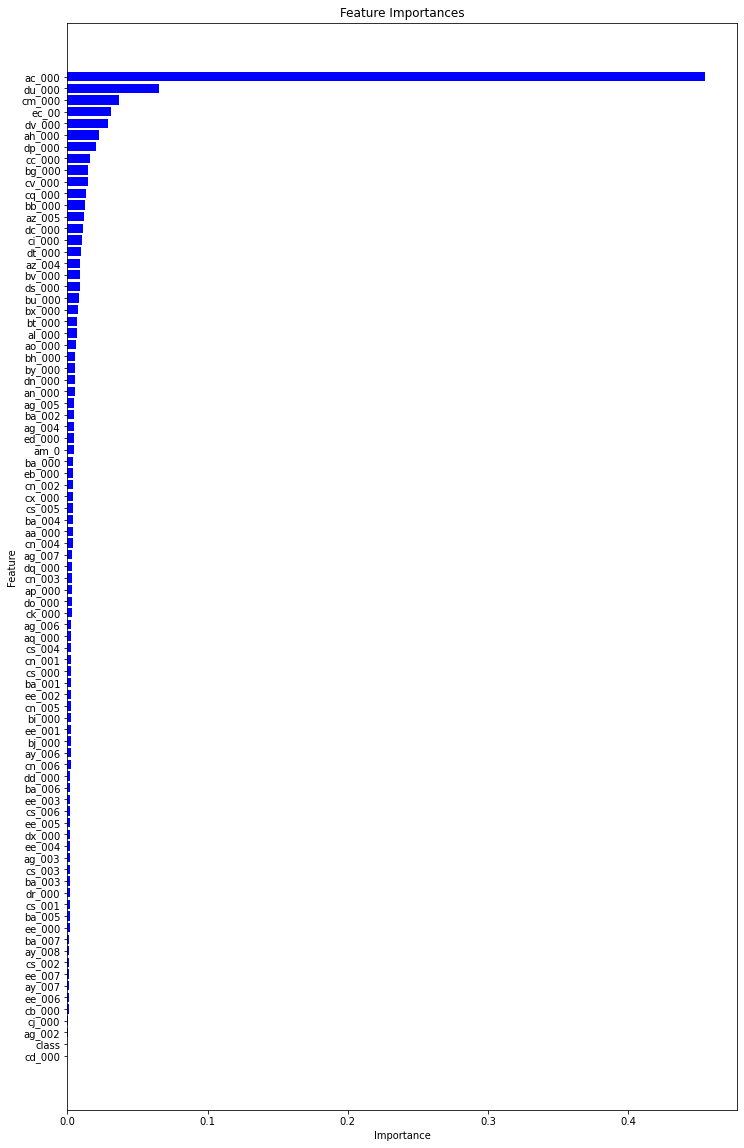

In [28]:
# Extraia as importâncias dos recursos
importances = model.feature_importances_

# Crie um DataFrame para exibir as importâncias
feature_names = X_train.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plotar as importâncias dos recursos
plt.figure(figsize=(12, 20))
plt.title("Feature Importances")
plt.barh(feature_importances['feature'], feature_importances['importance'], color='b', align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')